In [23]:
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Define the path to your JSON file
json_file_path = 'News_Category_Dataset_v3.json'

# Load the data
data = []
with open(json_file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)


In [25]:
# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


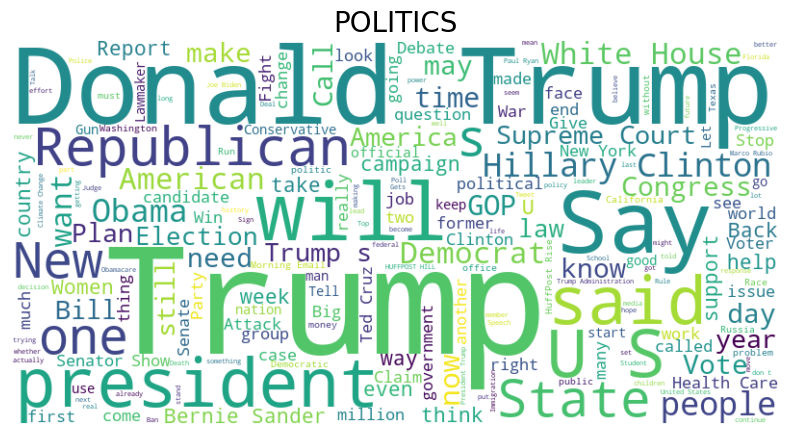

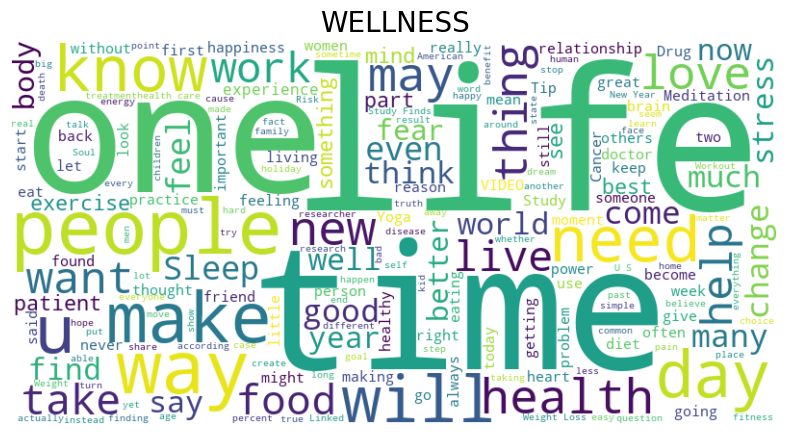

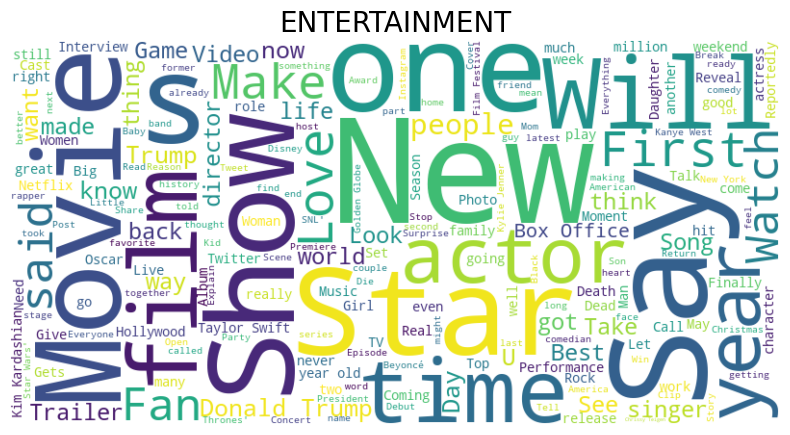

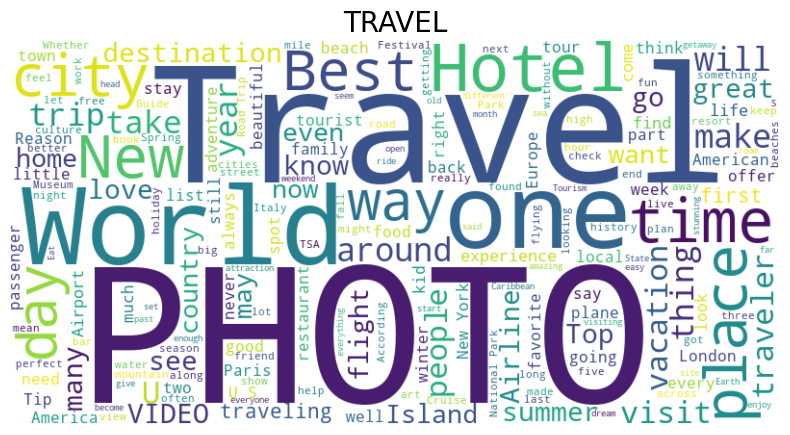

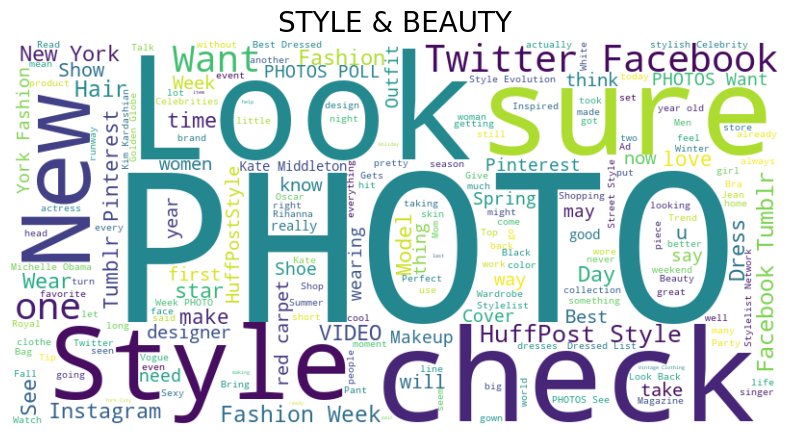

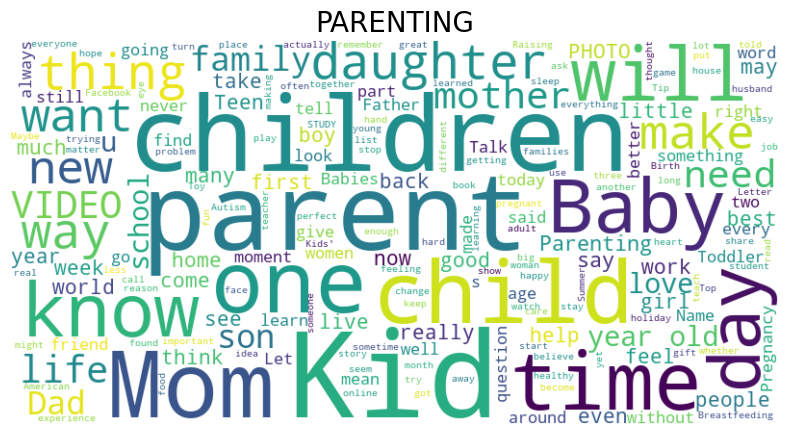

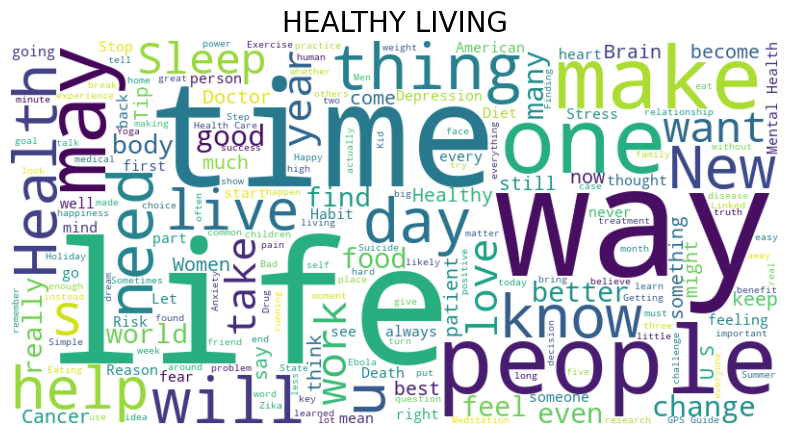

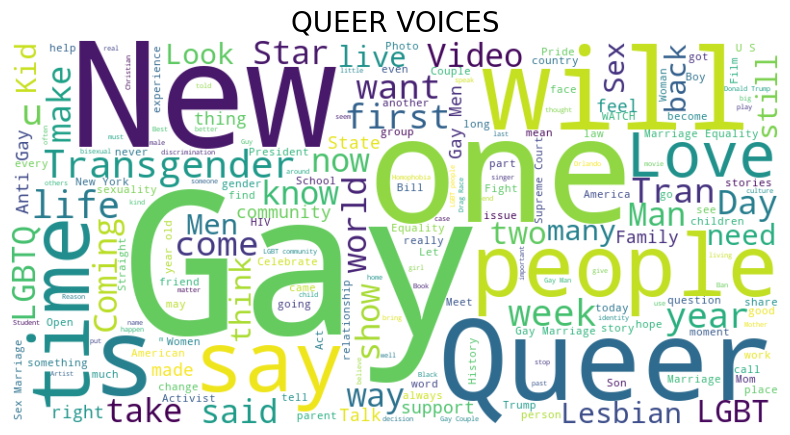

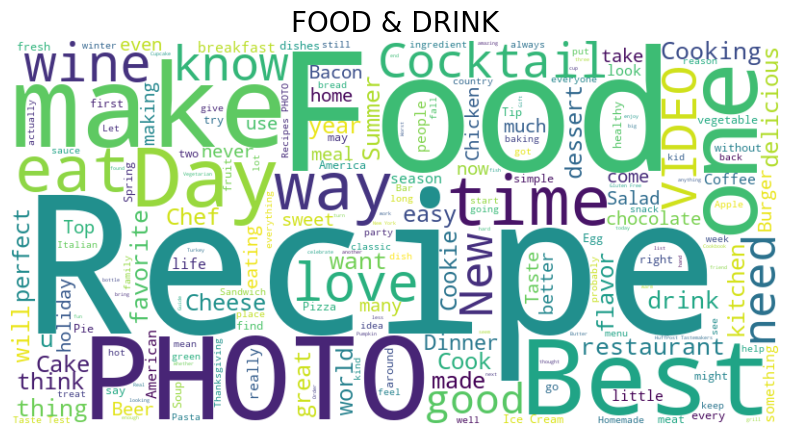

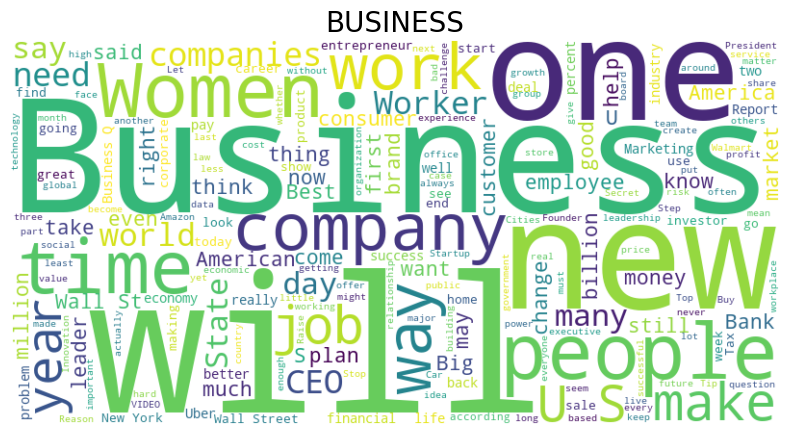

In [26]:
# Count the number of articles per category
category_counts = df['category'].value_counts()

# Select top 10 categories
top_10_categories = category_counts.nlargest(10).index.tolist()

# Create a dictionary to store concatenated text for each category
category_texts = {}

for category in top_10_categories:
    # Filter articles belonging to the category
    category_df = df[df['category'] == category]
    
    # Concatenate the 'headline' and 'short_description' columns
    combined_text = ' '.join(category_df['headline'].astype(str) + ' ' + category_df['short_description'].astype(str))
    
    # Store the combined text in the dictionary
    category_texts[category] = combined_text
    
    # Generate and display the word cloud
    generate_word_cloud(combined_text, category)



In [27]:
category_dictionaries = {}
for category, text in category_texts.items():
    words = text.split()
    category_dictionaries[category] = set(words)


In [28]:
def predict_category(text, category_dicts):
    word_counts = {category: 0 for category in category_dicts}
    words = text.split()
    for word in words:
        for category, dictionary in category_dicts.items():
            if word in dictionary:
                word_counts[category] += 1
    return max(word_counts, key=word_counts.get)


In [29]:
def predict_category(text, category_dicts):
    word_counts = {category: 0 for category in category_dicts}
    words = text.split()
    for word in words:
        for category, dictionary in category_dicts.items():
            if word in dictionary:
                word_counts[category] += 1
    return max(word_counts, key=word_counts.get)


In [30]:
# Apply prediction on the dataset for the top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]
df_top_10['combined_text'] = df_top_10['headline'].fillna('') + ' ' + df_top_10['short_description'].fillna('')
df_top_10['predicted_category'] = df_top_10['combined_text'].apply(lambda x: predict_category(x, category_dictionaries))

# Calculate accuracy
accuracy = (df_top_10['category'] == df_top_10['predicted_category']).mean()
print(f"Accuracy for top 10 categories: {accuracy:.2%}")


Accuracy for top 10 categories: 91.14%
